## Evaluation Phase

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from collections import namedtuple

%matplotlib inline
#
from evaluation import *
from approximator import *
from q_learning_nn import *

#import environment
sys.path.append(r'../virl')
import virl

In [2]:

#load test environment
env = virl.Epidemic(problem_id=9, noisy=True, stochastic=True)

n_episode = 200

alpha = 0.001
nn_config = [36, 36, 36]
d_states = env.observation_space.shape[0]
n_actions = env.action_space.n

approximator = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)

In [3]:
policy = policy_generator(env, approximator=approximator, policy_type="greedy")

stats = EpisodeStats(
    episode_rewards = np.zeros(n_episode),
    episode_lengths = np.zeros(n_episode)
)

for i_episode in range(n_episode):
    states, rewards, actions, steps= exec_agent(policy, env)
    stats.episode_rewards[i_episode] = sum(rewards)
    stats.episode_lengths[i_episode] = steps
    print('\r runing episode {} sum {}'.format(i_episode, sum(rewards)), end='')
    sys.stdout.flush()

 runing episode 199 sum -1.6336970347425033

plot all figures

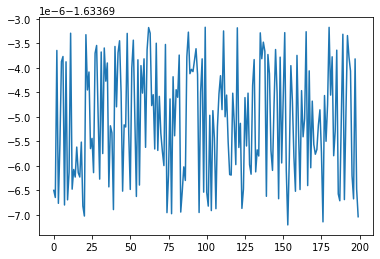

In [5]:
plt.plot(stats.episode_rewards)

In [7]:
print(np.std(stats.episode_rewards))
print(np.mean(stats.episode_rewards))

1.1731822346915145e-06
-1.6336950761451343
